In [1]:
# import dependencies
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create the path and import the data
oscar_data = os.path.join('../analysis files/the_oscar_award.csv')
oscar_df = pd.read_csv(oscar_data)

In [4]:
# View data
oscar_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [5]:
# View tail of dataframe
oscar_df.tail()

,year_film,year_ceremony,ceremony,category,name,film,winner
10754,2022,2023,95,Writing (Original Screenplay),Written by Martin McDonagh,The Banshees of Inisherin,NaN
10755,2022,2023,95,Writing (Original Screenplay),Written by Daniel Kwan & Daniel Scheinert,Everything Everywhere All at Once,NaN
10756,2022,2023,95,Writing (Original Screenplay),Written by Steven Spielberg & Tony Kushner,The Fabelmans,NaN
10757,2022,2023,95,Writing (Original Screenplay),Written by Todd Field,Tár,NaN
10758,2022,2023,95,Writing (Original Screenplay),Written by Ruben Östlund,Triangle of Sadness,NaN


In [6]:
# Check for null values
oscar_df.isnull().sum()

year_film          0
year_ceremony      0
ceremony           0
category           0
name               3
film             310
winner           120
dtype: int64

In [7]:
# Drop rows with null values and verify removal
oscar_df.dropna(axis=0,how="any",inplace=True)
oscar_df.isnull().sum()

year_film        0
year_ceremony    0
ceremony         0
category         0
name             0
film             0
winner           0
dtype: int64

In [8]:
# Check for duplicated rows
oscar_df.duplicated().sum()

6

In [9]:
# Drop duplicated rows and verify removal
oscar_df = oscar_df.drop_duplicates()
oscar_df.duplicated().sum()

0

In [10]:
# View head of cleaned oscar dataframe
oscar_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [11]:
# Check data types
oscar_df.dtypes

year_film         int64
year_ceremony     int64
ceremony          int64
category         object
name             object
film             object
winner           object
dtype: object

In [12]:
# Display summary statistics 
oscar_df.describe()

,year_film,year_ceremony,ceremony
count,10323.000000,10323.000000,10323.000000
mean,1975.710743,1976.710743,48.733314
std,26.667309,26.667309,26.628722
min,1927.000000,1928.000000,1.000000
25%,1952.000000,1953.000000,25.000000
50%,1975.000000,1976.000000,48.000000
75%,1999.000000,2000.000000,72.000000
max,2021.000000,2022.000000,94.000000


In [13]:
# Examine the winner column
oscar_df['winner'].unique()

array([False, True], dtype=object)

In [14]:
# Display value counts of winner column
oscar_df['winner'].value_counts()

False    8198
True     2125
Name: winner, dtype: int64

In [42]:
# Create dataframe to hold the winning nominations
winner_df = oscar_df.loc[(oscar_df['winner'] == True)]
winner_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True
10,1927,1928,1,CINEMATOGRAPHY,Karl Struss,Sunrise,True


In [49]:
# Count winner dataframe rows
num_win = winner_df['winner'].count()

In [44]:
# Create dataframe to hold the losing nominations
lost_df = oscar_df.loc[(oscar_df['winner'] == False)]
lost_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
5,1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,False
7,1927,1928,1,ART DIRECTION,Harry Oliver,7th Heaven,False


In [48]:
# Count lost_df rows
num_lost = lost_df['winner'].count()

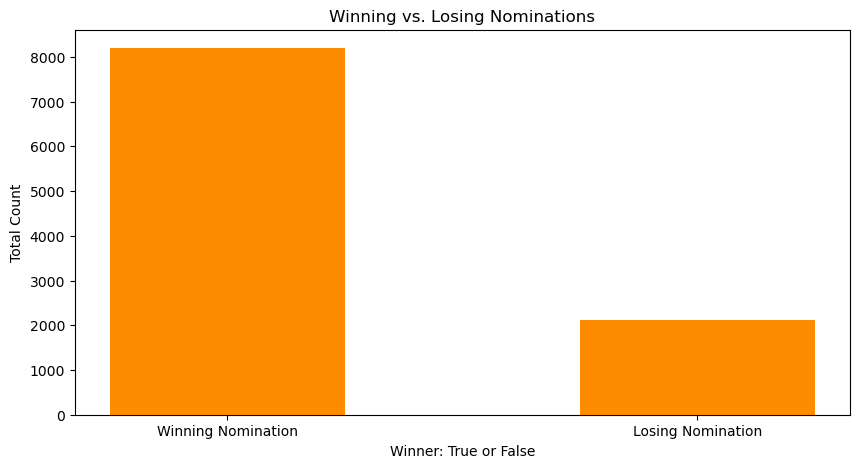

In [51]:
# Create a barchart to show the number winning vs. losing nominations
# creating the dataset
data = {'Winning Nomination': num_lost, 'Losing Nomination': num_win}

nominations = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10,5))
 
# creating the bar plot
plt.bar(nominations, values, color ='darkorange',
        width = 0.5)
 
plt.xlabel("Winner: True or False")
plt.ylabel("Total Count")
plt.title("Winning vs. Losing Nominations")
plt.show()

fig.savefig('../win_vs_lose.png')   # save the figure to file
plt.close(fig)    # close the figure window

In [53]:
winner_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True
10,1927,1928,1,CINEMATOGRAPHY,Karl Struss,Sunrise,True


In [55]:
# Winning actress nominations
win_actress = oscar_df.loc[(oscar_df['category'] == 'ACTRESS') & (oscar_df['winner'] == True)]
win_actress.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
45,1928,1929,2,ACTRESS,Mary Pickford,Coquette,True
82,1929,1930,3,ACTRESS,Norma Shearer,The Divorcee,True
121,1930,1931,4,ACTRESS,Marie Dressler,Min and Bill,True
164,1931,1932,5,ACTRESS,Helen Hayes,The Sin of Madelon Claudet,True


In [56]:
# Count winning actresses
win_actress['ceremony'].count()

49

In [60]:
# Winning actor nominations
win_actor = oscar_df.loc[(oscar_df['category'] == 'ACTOR') & (oscar_df['winner'] == True)]
win_actor.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
36,1928,1929,2,ACTOR,Warner Baxter,In Old Arizona,True
73,1929,1930,3,ACTOR,George Arliss,Disraeli,True
115,1930,1931,4,ACTOR,Lionel Barrymore,A Free Soul,True
159,1931,1932,5,ACTOR,Wallace Beery,The Champ,True


In [61]:
# Count winning actors
win_actor['ceremony'].count()

49

In [16]:
# Explore category column
oscar_df['category'].unique()

array(['ACTOR', 'ACTRESS', 'ART DIRECTION', 'CINEMATOGRAPHY',
       'DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)',
       'ENGINEERING EFFECTS', 'OUTSTANDING PICTURE',
       'UNIQUE AND ARTISTIC PICTURE', 'WRITING (Adaptation)',
       'WRITING (Original Story)', 'WRITING (Title Writing)', 'DIRECTING',
       'WRITING', 'OUTSTANDING PRODUCTION', 'SOUND RECORDING',
       'SHORT SUBJECT (Cartoon)', 'SHORT SUBJECT (Comedy)',
       'SHORT SUBJECT (Novelty)', 'ASSISTANT DIRECTOR', 'FILM EDITING',
       'MUSIC (Scoring)', 'MUSIC (Song)', 'DANCE DIRECTION',
       'WRITING (Screenplay)', 'ACTOR IN A SUPPORTING ROLE',
       'ACTRESS IN A SUPPORTING ROLE', 'SHORT SUBJECT (Color)',
       'SHORT SUBJECT (One-reel)', 'SHORT SUBJECT (Two-reel)',
       'MUSIC (Original Score)', 'CINEMATOGRAPHY (Black-and-White)',
       'CINEMATOGRAPHY (Color)', 'SPECIAL EFFECTS',
       'ART DIRECTION (Black-and-White)', 'ART DIRECTION (Color)',
       'WRITING (Original Screenplay)', 'DOCUME

In [17]:
# Display value counts category column
oscar_df['category'].value_counts()

DIRECTING                                    459
FILM EDITING                                 440
ACTRESS IN A SUPPORTING ROLE                 430
ACTOR IN A SUPPORTING ROLE                   430
DOCUMENTARY (Short Subject)                  378
                                            ... 
DIRECTING (Comedy Picture)                     2
SPECIAL ACHIEVEMENT AWARD (Sound Editing)      1
SPECIAL ACHIEVEMENT AWARD (Sound Effects)      1
WRITING (Title Writing)                        1
ENGINEERING EFFECTS                            1
Name: category, Length: 104, dtype: int64

In [18]:
# Create dataframe for sound effects category
sound_effects = oscar_df.loc[(oscar_df['category'] == 'SOUND EFFECTS EDITING')]
sound_effects.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
6130,1982,1983,55,SOUND EFFECTS EDITING,Mike Le-Mare,Das Boot,False
6131,1982,1983,55,SOUND EFFECTS EDITING,"Charles L. Campbell, Ben Burtt",E.T. The Extra-Terrestrial,True
6132,1982,1983,55,SOUND EFFECTS EDITING,"Stephen Hunter Flick, Richard L. Anderson",Poltergeist,False
6237,1983,1984,56,SOUND EFFECTS EDITING,Ben Burtt,Return of the Jedi,False
6238,1983,1984,56,SOUND EFFECTS EDITING,Jay Boekelheide,The Right Stuff,True


In [19]:
# Count sound effects dataframe
sound_effects['winner'].value_counts()

False    31
True     16
Name: winner, dtype: int64

In [20]:
# Explore category column 'ACTOR'
actor_df = oscar_df.loc[(oscar_df['category'] == 'ACTOR')]
actor_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
35,1928,1929,2,ACTOR,George Bancroft,Thunderbolt,False
36,1928,1929,2,ACTOR,Warner Baxter,In Old Arizona,True
37,1928,1929,2,ACTOR,Chester Morris,Alibi,False


In [21]:
# Count actor dataframe
actor_df['winner'].value_counts()

False    183
True      49
Name: winner, dtype: int64

In [22]:
# count the actor rows
num_actor = actor_df['category'].count()
num_actor

232

In [23]:
# Create actress dataframe
actress_df = oscar_df.loc[(oscar_df['category'] == 'ACTRESS')]
actress_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
40,1928,1929,2,ACTRESS,Ruth Chatterton,Madame X,False
41,1928,1929,2,ACTRESS,Betty Compson,The Barker,False


In [24]:
# View value counts of actress dataframe
actress_df['winner'].value_counts()

False    187
True      49
Name: winner, dtype: int64

In [25]:
# Count actress dataframe entries 
num_actress = actress_df['category'].count()
num_actress

236

In [26]:
# Create supporting actress dataframe
sup_actress = oscar_df.loc[(oscar_df['category'] == 'ACTRESS IN A SUPPORTING ROLE')]
sup_actress.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
430,1936,1937,9,ACTRESS IN A SUPPORTING ROLE,Beulah Bondi,The Gorgeous Hussy,False
431,1936,1937,9,ACTRESS IN A SUPPORTING ROLE,Alice Brady,My Man Godfrey,False
432,1936,1937,9,ACTRESS IN A SUPPORTING ROLE,Bonita Granville,These Three,False
433,1936,1937,9,ACTRESS IN A SUPPORTING ROLE,Maria Ouspenskaya,Dodsworth,False
434,1936,1937,9,ACTRESS IN A SUPPORTING ROLE,Gale Sondergaard,Anthony Adverse,True


In [27]:
# Count actress in supporting role 
num_sup_actress = sup_actress['category'].count()
num_sup_actress

430

In [28]:
# Create supporting actor dataframe
sup_actor = oscar_df.loc[(oscar_df['category'] == 'ACTOR IN A SUPPORTING ROLE')]
sup_actor.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
420,1936,1937,9,ACTOR IN A SUPPORTING ROLE,Mischa Auer,My Man Godfrey,False
421,1936,1937,9,ACTOR IN A SUPPORTING ROLE,Walter Brennan,Come and Get It,True
422,1936,1937,9,ACTOR IN A SUPPORTING ROLE,Stuart Erwin,Pigskin Parade,False
423,1936,1937,9,ACTOR IN A SUPPORTING ROLE,Basil Rathbone,Romeo and Juliet,False
424,1936,1937,9,ACTOR IN A SUPPORTING ROLE,Akim Tamiroff,The General Died at Dawn,False


In [29]:
# Count supporting actor 
num_sup_actor = actor_df['category'].count()
num_sup_actor

232

In [30]:
# Create lead actress dataframe
lead_actress = oscar_df.loc[(oscar_df['category'] == 'ACTRESS IN A LEADING ROLE')]
lead_actress.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
5415,1976,1977,49,ACTRESS IN A LEADING ROLE,Marie-Christine Barrault,"Cousin, Cousine",False
5416,1976,1977,49,ACTRESS IN A LEADING ROLE,Faye Dunaway,Network,True
5417,1976,1977,49,ACTRESS IN A LEADING ROLE,Talia Shire,Rocky,False
5418,1976,1977,49,ACTRESS IN A LEADING ROLE,Sissy Spacek,Carrie,False
5419,1976,1977,49,ACTRESS IN A LEADING ROLE,Liv Ullmann,Face to Face,False


In [31]:
# Count leading actress
num_lead_actress = lead_actress['category'].count()
num_lead_actress

230

In [32]:
# Create lead actor dataframe
lead_actor = oscar_df.loc[(oscar_df['category'] == 'ACTOR IN A LEADING ROLE')]
lead_actor.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
5405,1976,1977,49,ACTOR IN A LEADING ROLE,Robert De Niro,Taxi Driver,False
5406,1976,1977,49,ACTOR IN A LEADING ROLE,Peter Finch,Network,True
5407,1976,1977,49,ACTOR IN A LEADING ROLE,Giancarlo Giannini,Seven Beauties,False
5408,1976,1977,49,ACTOR IN A LEADING ROLE,William Holden,Network,False
5409,1976,1977,49,ACTOR IN A LEADING ROLE,Sylvester Stallone,Rocky,False


In [33]:
# Count leading actor
num_lead_actor = lead_actor['category'].count()
num_lead_actor

230

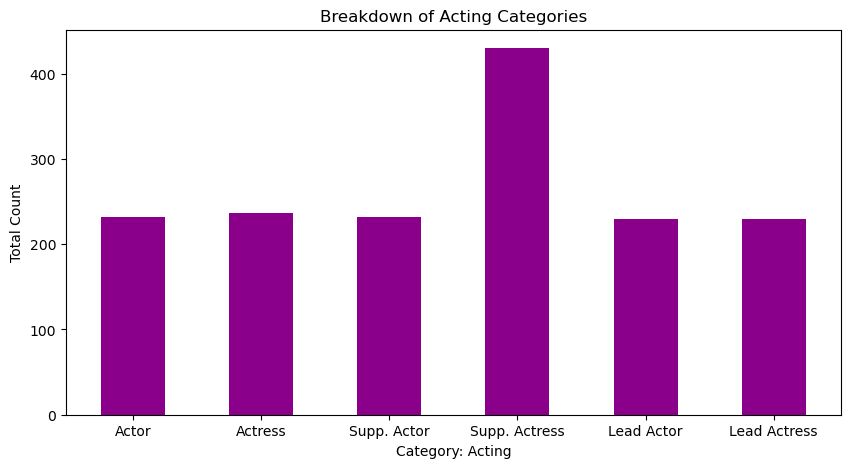

In [34]:
# Create a barchart to show the number of men vs. females nominated for the acting category

# creating the dataset
data = {'Actor': num_actor, 'Actress': num_actress, 'Supp. Actor': num_sup_actor,
        'Supp. Actress': num_sup_actress, 'Lead Actor': num_lead_actor, 'Lead Actress': num_lead_actress}

acting = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10,5))
 
# creating the bar plot
plt.bar(acting, values, color ='darkmagenta',
        width = 0.5)
 
plt.xlabel("Category: Acting")
plt.ylabel("Total Count")
plt.title("Breakdown of Acting Categories")
plt.show()

fig.savefig('../number_acting.png')   # save the figure to file
plt.close(fig)    # close the figure window

In [36]:
oscar_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [37]:
by_film_df = oscar_df.iloc[0:,[5,3,4,6]]
by_film_df

,film,category,name,winner
0,The Noose,ACTOR,Richard Barthelmess,False
1,The Last Command,ACTOR,Emil Jannings,True
2,A Ship Comes In,ACTRESS,Louise Dresser,False
3,7th Heaven,ACTRESS,Janet Gaynor,True
4,Sadie Thompson,ACTRESS,Gloria Swanson,False
...,...,...,...,...
10630,Belfast,WRITING (Original Screenplay),Written by Kenneth Branagh,True
10631,Don't Look Up,WRITING (Original Screenplay),Screenplay by Adam McKay; Story by Adam McKay ...,False
10632,King Richard,WRITING (Original Screenplay),Written by Zach Baylin,False
10633,Licorice Pizza,WRITING (Original Screenplay),Written by Paul Thomas Anderson,False
